# Housing Prices - Advanced Regression Techniques 

### James Mwakichako - jmwakich@hawk.iit.edu
### Michael Baroody  - mbaroody@hawk.iit.edu

### Description 

This projects attemps to predict the final sale price of a home given certain features of houses such as square footage, pool area, if it has a second floor or not. In total, there are 80 features initially and the final sale price with is the target. 

In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv", header = 0)

In [3]:
print('Number of datapoints: %s' % train.shape[0])
print('Number of features: %s' % train.shape[1])

Number of datapoints: 1460
Number of features: 81


# Visualization of all features (target='SalePrice')

Mean: 10516.83
Variance: 99557412.90
Percent values missing: 0.000000%


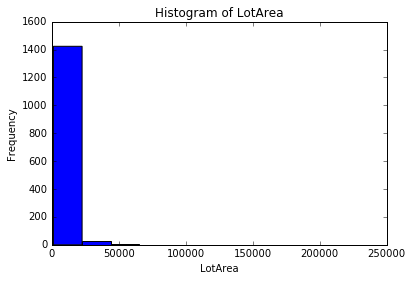

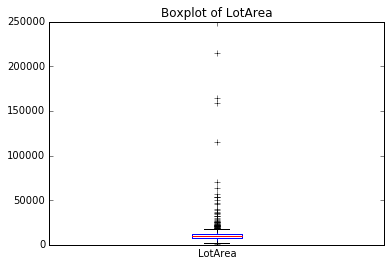

In [4]:
features = [feature for feature in train.columns.values]

features_dropdown = widgets.Dropdown(
    options=features,
    value='TotalBsmtSF',
    description='Feature',
    disabled=False,
    button_style='info'
)

categorical_features = [cat_feature for cat_feature in train.columns.values if train[cat_feature].dtype == 'object']
categorical_features.extend(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                             'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                             'TotRmsAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'])


def display_stats(feature):
    
    if feature in categorical_features:
        stringified = train[feature].apply(lambda x: str(x)).values
        print("Percent values missing: %f%%" % (100*(np.sum(stringified == 'nan') / len(train[feature].values))))
        
        nan_indices = np.where(stringified == 'nan')[0]
        stringified = np.delete(stringified, nan_indices)
        
        labels = np.unique(stringified)
        data = [np.sum(stringified == l) for l in labels]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Visualization of %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        if feature == 'MoSold':
            labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        ax.bar(range(len(data)), data, tick_label=labels)
        #ax.xticks(range(len(lables)), labels)
        plt.show()
    else:
        x = train[feature].values
    
        #find zero indices
        zero_indices = np.where(x == 0)[0]
        nan_indices = np.where(np.isnan(x))[0]
        #delete these datapoints from x and y
    
        x = np.delete(x, zero_indices)
        x = np.delete(x, nan_indices)
        
        print('Mean: %.2f' % np.mean(x))
        print('Variance: %.2f' % np.var(x))
        # we don't count zeros as missing
        print('Percent values missing: %f%%' % (100*((len(nan_indices)) / len(train[feature].values))))
    
        fig1 = plt.figure(1)
        ax1 = fig1.add_subplot(1, 1, 1)
        ax1.set_title('Histogram of %s' % feature)
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Frequency')
        ax1.hist(x)
        
        fig2 = plt.figure(2)
        ax2= fig2.add_subplot(1, 1, 1)
        ax2.set_title('Boxplot of %s' % feature)
        ax2.boxplot([list(x)], labels=[feature])
        plt.show()

widgets.interact(display_stats, feature=features_dropdown)

# Visualization of Final Sale Price vs. Features

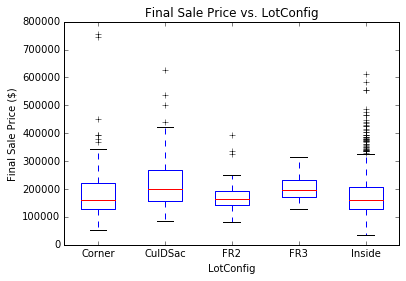

In [5]:
features_dropdown = widgets.Dropdown(
    options=features,
    value='TotalBsmtSF',
    description='Feature',
    disabled=False,
    button_style='info'
)

def display_salePrice_vs_feature(feature):
    
    if feature in categorical_features:
        labels = np.unique(train[feature].apply(lambda x: str(x)).values)
        data = {str(l): list() for l in labels}
        for idx, val in enumerate(train['SalePrice'].values):
            data[str(train[feature].values[idx])].append(val)
        data = [d[1] for d in sorted(list(data.items()), key=lambda x: x[0])]
        #delete datapoints with nan (always last bc sorted)
        
        labels = list(labels)
        if 'nan' in labels:
            del labels[-1]
            del data[-1]
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')
        ax.boxplot(data, labels=labels)
        plt.show()
    else:
        x = train[feature].values
        y = train['SalePrice'].values
    
        #find zero indices
        zero_indices = np.where(x == 0)[0]
        #delete these datapoints from x and y
    
        x = np.delete(x, zero_indices)
        y = np.delete(y, zero_indices)
    
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')

        ax.scatter(x, y)
        plt.show()

widgets.interact(display_salePrice_vs_feature, feature=features_dropdown)


